In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import datetime
import yfinance  as yf
yf.pdr_override()

C:\Users\vinicius_coin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [3]:

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2018, 1, 1)

tickers = ['AAPL', 'ADBE', 'SYMC', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM', 'SPY']



df = pdr.get_data_yahoo(tickers, start, end)['Close']
df.tail()

[*********************100%***********************]  11 of 11 completed

1 Failed download:
- SYMC: No data found, symbol may be delisted


,AAPL,ADBE,AMD,EBAY,HPQ,IBM,JNPR,MSFT,QCOM,SPY,SYMC
Date,,,,,,,,,,,
2017-12-22 00:00:00,175.009995,175.000000,10.54,37.759998,21.26,152.500000,28.860001,85.510002,64.730003,267.510010,NaN
2017-12-26 00:00:00,170.570007,174.440002,10.46,37.939999,21.23,152.830002,28.860001,85.400002,64.300003,267.190002,NaN
2017-12-27 00:00:00,170.600006,175.360001,10.53,37.610001,21.27,153.130005,28.879999,85.709999,64.540001,267.320007,NaN
2017-12-28 00:00:00,171.080002,175.550003,10.55,37.919998,21.15,154.039993,28.870001,85.720001,64.379997,267.869995,NaN
2017-12-29 00:00:00,169.229996,175.240005,10.28,37.740002,21.01,153.419998,28.500000,85.540001,64.019997,266.859985,NaN


In [4]:
acao1 = 'ADBE'
acao2 = 'MSFT'
S1 = df['ADBE']
S2 = df['MSFT']

score, pvalue, _ = coint(S1, S2)
pvalue

0.16848956101802132

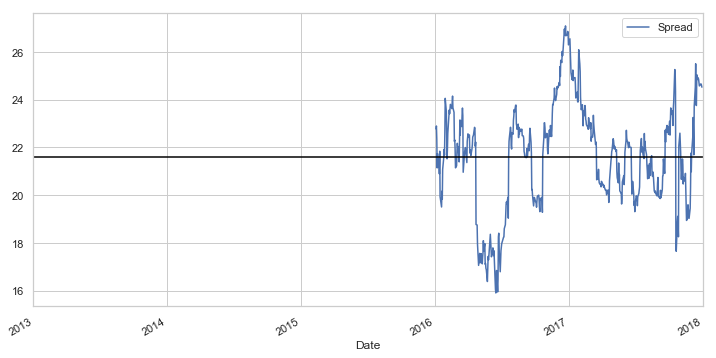

In [5]:

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['ADBE']
b = results.params['ADBE']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread']);

In [6]:
df.head()

,AAPL,ADBE,AMD,EBAY,HPQ,IBM,JNPR,MSFT,QCOM,SPY,SYMC
Date,,,,,,,,,,,
2016-01-04 00:00:00,105.349998,91.970001,2.77,26.430000,11.60,135.949997,27.410000,54.799999,50.119999,201.020004,NaN
2016-01-05 00:00:00,102.709999,92.339996,2.75,26.120001,11.71,135.850006,27.549999,55.049999,49.139999,201.360001,NaN
2016-01-06 00:00:00,100.699997,91.019997,2.51,26.410000,11.29,135.169998,26.780001,54.049999,48.639999,198.820007,NaN
2016-01-07 00:00:00,96.449997,89.110001,2.28,25.690001,10.77,132.860001,26.090000,52.169998,46.139999,194.050003,NaN
2016-01-08 00:00:00,96.959999,87.849998,2.14,25.750000,10.58,131.630005,25.719999,52.330002,45.880001,191.919998,NaN


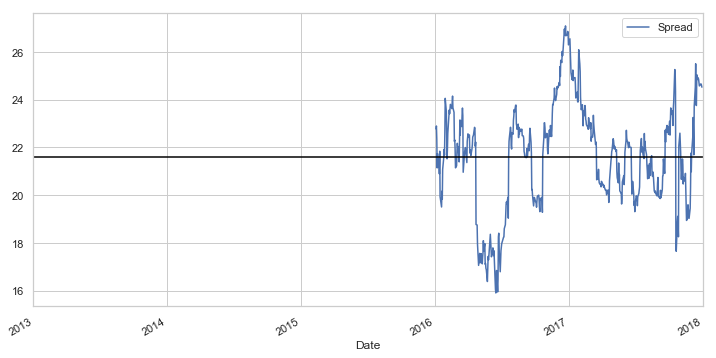

In [7]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['ADBE']
b = results.params['ADBE']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread']);

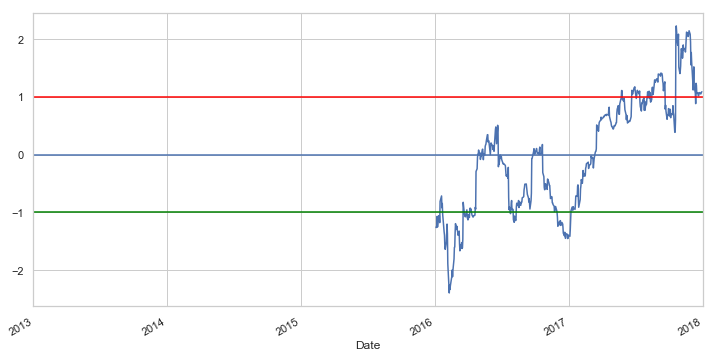

In [8]:
ratio = S1/S2
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.show()

In [9]:
ratios = df['ADBE'] / df['MSFT'] 
print(len(ratios) * .70 )
print(len(ratios) * .70 )


352.09999999999997
352.09999999999997


In [10]:
train = ratios[:352]
test = ratios[352:]

In [29]:
dftrade = pd.DataFrame()
lcountS1 = []
lcountS2 = []
lacao1   = []
lacao2   = []
lratios = []
lzscore = []
lmoney = []
lS1 = []
lS2 = []
laction = []
action = ''

def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        action = 'hold'
        # Sell short if the z-score is > 1
        if zscore[i] < -2:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            action = 'sell short'
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 2:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            action = 'buy long'
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5    
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            action = 'clear'
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))        
        laction.append(action)
        lS1.append(S1[i])
        lS2.append(S2[i])
        lcountS1.append(countS1)
        lcountS2.append(countS2)
        lacao1.append(S1[i])
        lacao2.append(S2[i])
        lratios.append(ratios[i])
        lzscore.append(zscore[i])
        lmoney.append(money)

    dftrade['S1'] = lS1
    dftrade['S2'] = lS2
    dftrade['countS1'] = lcountS1
    dftrade['countS2'] = lcountS2
    dftrade[acao2] = lacao2
    dftrade[acao1] = lacao1
    dftrade['ratios'] = lratios
    dftrade['zscore'] = lzscore
    dftrade['action'] = laction
    dftrade['money'] = lmoney
    return money

In [30]:
trade(df['ADBE'].iloc[352:], df['MSFT'].iloc[352:], 60, 5)

595.0427675280021

In [31]:
dftrade.tail(60)

,S1,S2,countS1,countS2,MSFT,ADBE,ratios,zscore,action,money
91,150.250000,75.970001,8,-15.900411,75.970001,150.250000,1.977754,4.204164,buy long,112.508207
92,151.119995,76.000000,9,-17.888832,76.000000,151.119995,1.988421,5.685952,buy long,112.508207
93,151.500000,76.290001,10,-19.874675,76.290001,151.500000,1.985843,5.689592,buy long,112.508207
94,152.149994,76.290001,11,-21.869039,76.290001,152.149994,1.994364,8.092660,buy long,112.508207
95,153.649994,76.419998,12,-23.879638,76.419998,153.649994,2.010599,3.786320,buy long,112.508207
96,153.610001,77.120003,13,-25.871469,77.120003,153.610001,1.991831,4.453294,buy long,112.508207
97,153.929993,77.489998,14,-27.857918,77.489998,153.929993,1.986450,4.291110,buy long,112.508207
98,150.460007,77.650002,14,-27.857918,77.650002,150.460007,1.937669,1.863213,hold,112.508207
99,150.380005,77.589996,14,-27.857918,77.589996,150.380005,1.938137,1.835196,hold,112.508207
100,153.000000,77.610001,15,-29.829314,77.610001,153.000000,1.971395,2.636249,buy long,112.508207
